## K-NN Classification (Bootstrap vs K-fold)

- Use the same simple data set from previous week
- We will use a simple data with two features (x1,x2)
- Two class labels 0 and 1.
- The data are drawn from two 2D normal distributions centered at (0,0) (class 0 and (1,1) (class 1)
- We will use this data to illustrate BootStrap and k-fold cross validation using KNN

In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot  as plt

df_train = pd.read_csv('small_xy_train.csv')
df_test = pd.read_csv('xy_test.csv')
display(df_train)
display(df_test)
x_train =df_train.iloc[:,[0,1]]
y_train =df_train['class']
x_test =df_test.iloc[:,[0,1]]
y_test =df_test['class']

,x1,y1,class
0,0.615173,0.552483,0.0
1,0.842144,1.333714,0.0
2,0.009547,-0.949798,0.0
3,-1.211606,0.534083,0.0
4,-0.333486,1.388597,0.0
5,-0.554051,-1.452701,0.0
6,0.128686,0.553576,0.0
7,-0.494526,-0.285008,0.0
8,1.085658,-0.629356,0.0
9,-0.495954,0.754311,0.0


,x1,y1,class
0,-0.747561,-0.350130,0.0
1,-1.021639,1.520665,0.0
2,0.133480,-0.157031,0.0
3,0.125565,0.378423,0.0
4,-0.378043,0.493251,0.0
...,...,...,...
395,2.432310,1.249967,1.0
396,0.812550,1.065843,1.0
397,-0.211510,-0.242653,1.0
398,0.257731,1.224265,1.0


### Scale Data and Scatter plot data with different colors for class labels

Text(0, 0.5, 'x2')

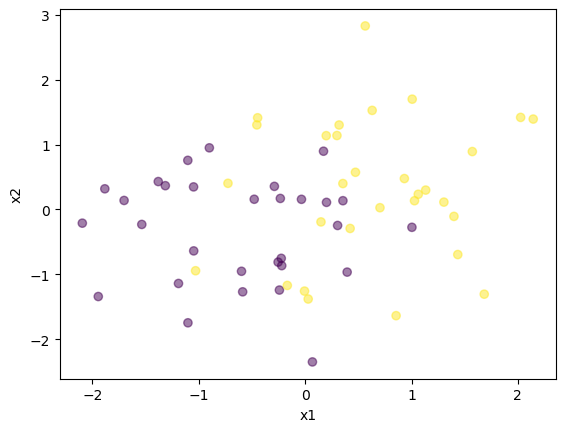

In [51]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler()
x_train_t = S.fit_transform(x_train)
x_test_t = S.transform(x_test)

plt.scatter(x_train_t[:,0], x_train_t[:,1], alpha=0.5,c=y_train)
plt.xlabel('x1')
plt.ylabel('x2')

### Load KNeighborsClassifier model

In [3]:
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random

## Boot strap sampling

In [52]:
bootstrap_iter = 200 # number of bootstrap samples
n_samples = x_train_t.shape[0] 
k_grid = [k for k in range(1,30)] # list that contains differerent values of k (nearest neighbors)

'''
Two data frames to store train score and vali score 
Data frame shape is (bootstrap_iter,len(k_grid))
Column in data frame will store the score for a specific k for all 
the bootstrap iterations
'''
bootstrap_results_train =pd.DataFrame(np.zeros(shape=(bootstrap_iter,len(k_grid))),columns=k_grid)
bootstrap_results_vali  =pd.DataFrame(np.zeros(shape=(bootstrap_iter,len(k_grid))),columns=k_grid)

'''
Create bootstrap_iter bootstrap samples
'''
for i in range(bootstrap_iter): 
    
    '''
    selected rows
    '''
    selected_idx = random.choices([row for row in range(n_samples)],k=n_samples)
    x_=x_train_t[selected_idx,:]
    y_=y_train[selected_idx]
    
    '''
    not selected rows become validation data
    '''
    vali_idx = list(set([row for row in range(n_samples)]) - set(selected_idx))
    x_vali=x_train_t[vali_idx,:]
    y_vali=y_train[vali_idx]
    
    '''
    for each option of k 
    '''
    for k in k_grid:
            
            clf = KNeighborsClassifier(n_neighbors=k)
            clf.fit(x_, y_)
            y_pred = clf.predict(x_)            
            bootstrap_results_train.iloc[i,k-k_grid[0]]=accuracy_score(y_,y_pred)
            y_pred = clf.predict(x_vali)
            bootstrap_results_vali.iloc[i,k-k_grid[0]]=accuracy_score(y_vali,y_pred)


### Results from Bootstrap resampling

best k based on mean vali score =  19
best  mean vali score =  0.7532697242610215


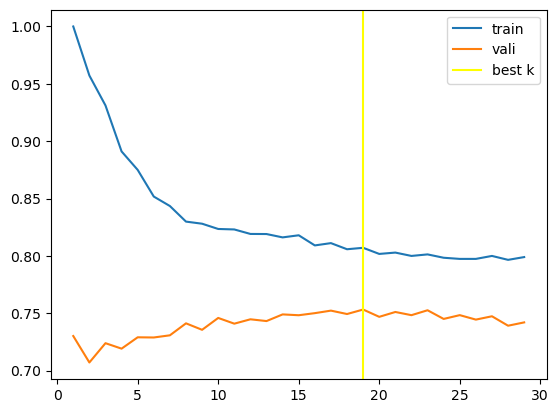

In [53]:
mean_train_score = bootstrap_results_train.mean(axis=0)
mean_vali_score = bootstrap_results_vali.mean(axis=0)

print("best k based on mean vali score = ",k_grid[np.argmax(mean_vali_score)])
print("best  mean vali score = ",np.max(mean_vali_score))

plt.plot(k_grid,mean_train_score)
plt.plot(k_grid,mean_vali_score)
plt.axvline(x = k_grid[np.argmax(mean_vali_score)], color = 'yellow')
plt.legend(['train','vali','best k'])

### 5-fold cross validation

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
knn_grid={'n_neighbors':k_grid}
knn_model = KNeighborsClassifier()
clf_knn = GridSearchCV(knn_model, 
                   param_grid = knn_grid,
                   scoring = 'accuracy',
                   cv = 5, 
                   n_jobs = 4, #parallel processing to reduce computation time
                   return_train_score = True)
clf_knn.fit(x_train_t,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             return_train_score=True, scoring='accuracy')

In [57]:
print('best parameters ',clf_knn.best_params_)
print('best validation score ', clf_knn.best_score_)

best parameters  {'n_neighbors': 11}
best validation score  0.8333333333333334


### 5-fold cross-validation vs bootstrap 

In [72]:
knn_model_2 = KNeighborsClassifier(n_neighbors = 2)
knn_model_11 = KNeighborsClassifier(n_neighbors = 11)
knn_model_19 = KNeighborsClassifier(n_neighbors = 19)
knn_model_2.fit(x_train_t,y_train)
knn_model_11.fit(x_train_t,y_train)
knn_model_19.fit(x_train_t,y_train)

KNeighborsClassifier(n_neighbors=19)

## Retrain on the entire training set and perform prediction on test set

- The estimate K=19 from bootstrap sampling does better on the test set.
- This doesn't mean bootstrap is always the best.
- Less overfitting for K = 19.
- May be when when the training size increases, it may be a different story.
- Note that the when the training size increases bootstrap sampling will take more time.

In [73]:
print("K-NN, K = 2")
print(accuracy_score(y_train,knn_model_2.predict(x_train_t)))
print(accuracy_score(y_test,knn_model_2.predict(x_test_t)))

print("K-NN, K = 11")
print(accuracy_score(y_train,knn_model_11.predict(x_train_t)))
print(accuracy_score(y_test,knn_model_11.predict(x_test_t)))

print("K-NN, K = 19")
print(accuracy_score(y_train,knn_model_19.predict(x_train_t)))
print(accuracy_score(y_test,knn_model_19.predict(x_test_t)))


K-NN, K = 2
0.9
0.715
K-NN, K = 11
0.8166666666666667
0.745
K-NN, K = 19
0.7833333333333333
0.7675


## Visualize boundaries

- K-NN doesn't really have a parametric decision boundary 
- create a grid of points
- predict on the points
- plot them as one color if predicted one class and different color if predicted the other class. 
- plot the training set data

In [74]:
def plot_result(model,sample,class_labels, linrange=(-2.2,2.2,101)):
    xmin, xmax, npoints = linrange
    gridx1, gridx2 = np.meshgrid(np.linspace(xmin,xmax,npoints), np.linspace(xmin,xmax,npoints))
    grid = np.c_[gridx1.flatten(), gridx2.flatten()]
    probs = model.predict_proba(grid)
    y_pred = model.predict(grid)
    plt.pcolor(gridx1, gridx2, y_pred.reshape(npoints,npoints), cmap='cool')
    plt.title('Training set')

    plt.colorbar()
    plt.scatter(sample[:,0], sample[:,1], c=class_labels, cmap='plasma', alpha=0.5, marker='.')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

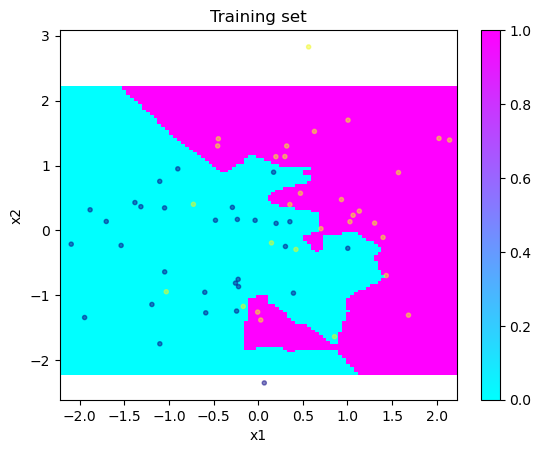

In [75]:
plot_result(knn_model_2,x_train_t,y_train, linrange=(-2.2,2.2,101))

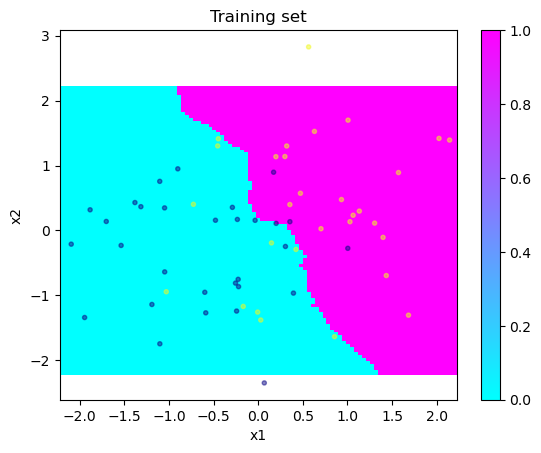

In [76]:
plot_result(knn_model_19,x_train_t,y_train, linrange=(-2.2,2.2,101))